In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#test_data=pd.read_csv(r"")
df=pd.read_csv(r"C:\Users\om\Downloads\titanic\train.csv")
cf=pd.read_csv(r"C:\Users\om\Downloads\titanic\test.csv")

In [3]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
total=df.isnull().sum().sort_values(ascending=False)
percent1=total/df.isnull().count()*100
percent2=round(percent1,1)
missing_data=pd.concat([total,percent2],axis=1,keys=['total','%'])
print(missing_data)

             total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
Fare             0   0.0
Ticket           0   0.0
Parch            0   0.0
SibSp            0   0.0
Sex              0   0.0
Name             0   0.0
Pclass           0   0.0
Survived         0   0.0
PassengerId      0   0.0


In [7]:
genders = {"male": 0, "female": 1}
data = [df,cf]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [36]:
df['Embarked'].describe()

count    891.000000
mean       1.992144
std        1.131244
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Embarked, dtype: float64

In [8]:
common_value = 'S'
data = [df,cf]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
df['Embarked'].isnull().sum()

0

In [9]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df,cf]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


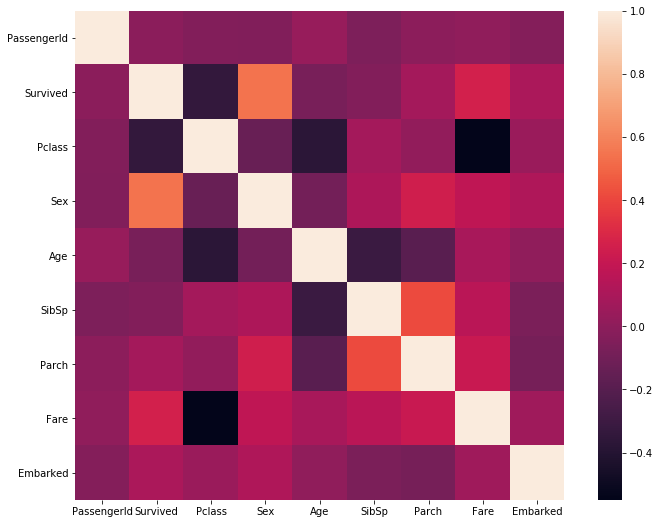

In [10]:
cormat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(cormat,vmax=1,square=True)

In [11]:
df=df.drop(["PassengerId","Ticket","Cabin","Name"],axis=1)

In [12]:
data=[df,cf]
for dataset in data:
    mean =df["Age"].mean()
    std = cf["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df["Age"].astype(int)
df["Age"].isnull().sum()

0

In [13]:
data=[df,cf]
for dataset in data:
    dataset.loc[dataset["Age"]<=11,'Age']=0
    dataset.loc[(dataset["Age"]>11)&(dataset["Age"]<=21)]=1
    dataset.loc[(dataset["Age"]>21)&(dataset["Age"]<=31)]=2
    dataset.loc[(dataset["Age"]>31)&(dataset["Age"]<=41)]=3
    dataset.loc[(dataset["Age"]>41)&(dataset["Age"]<=51)]=4
    dataset.loc[dataset["Age"]>51,'Age']=5

In [14]:
data = [df,cf]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [15]:
df['Embarked'].describe()

count    891.000000
mean       1.992144
std        1.131244
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Embarked, dtype: float64

In [16]:
data = [df, cf]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [17]:
data = [df,cf]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [18]:
data=[df,cf]
for dataset in data:
    dataset['relatives']=dataset['SibSp']+dataset['Parch']
    dataset.loc[dataset['relatives']>0,'not_alone']=0
    dataset.loc[dataset['relatives']==0,'not_alone']=1
    dataset['relatives']=dataset['relatives'].astype(int)

In [19]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class,relatives,not_alone,Fare_Per_Person
0,2,2,2,2,2,2,0,2,4,4,0.0,0
1,3,3,3,3,3,3,0,3,9,6,0.0,0
2,2,2,2,2,2,2,0,2,4,4,0.0,0
3,3,3,3,3,3,3,0,3,9,6,0.0,0
4,3,3,3,3,3,3,0,3,9,6,0.0,0
5,2,2,2,2,2,2,0,2,4,4,0.0,0
6,0,1,0,5,0,0,3,0,5,0,1.0,3
7,0,3,0,0,3,1,2,0,0,4,0.0,0
8,2,2,2,2,2,2,0,2,4,4,0.0,0
9,1,1,1,1,1,1,0,1,1,2,0.0,0


In [20]:
cf=cf.drop(["Name","Ticket","Cabin","PassengerId"],axis=1)
cf.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Class,relatives,not_alone,Fare_Per_Person
0,2,2,2,2,2,0,2,4,4,0.0,0
1,3,3,3,3,3,0,3,9,6,0.0,0
2,2,2,2,2,2,0,2,4,4,0.0,0
3,3,3,3,3,3,0,3,9,6,0.0,0
4,3,3,3,3,3,0,3,9,6,0.0,0
5,2,2,2,2,2,0,2,4,4,0.0,0
6,3,1,5,0,0,0,2,15,0,1.0,0
7,2,0,0,1,1,2,0,0,2,0.0,0
8,2,2,2,2,2,0,2,4,4,0.0,0
9,1,1,1,1,1,0,1,1,2,0.0,0


In [21]:
x_train=df.drop("Survived",axis=1)
y_train=df["Survived"]
x_test=cf

In [30]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import sklearn

In [23]:
array=dataset.values
X=df.drop('Survived',axis=1)
Y=df['Survived']
X_train,X_validation,Y_train,Y_validation=model_selection.train_test_split(X,Y,test_size=0.2,random_state=7)

In [24]:
LR=LogisticRegression()
LR.fit(X_train,Y_train)

E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
scoring='accuracy'

In [26]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(('Kmeans',KMeans(n_clusters=2)))

In [27]:
results=[]
names=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=7)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

LR 0.983196 (0.013661)
KNN 0.983157 (0.010504)


E:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

SVM 0.983157 (0.010504)
Kmeans 0.151663 (0.114354)


In [28]:
for name,model in models:
    model.fit(X_train,Y_train)
    predictions=model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation,predictions))
    print(classification_report(Y_validation,predictions))

LR
0.9441340782122905
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.88      0.88      0.88        41
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        21

    accuracy                           0.94       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.94      0.94      0.94       179

KNN
0.9441340782122905
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.90      0.85      0.88        41
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        21

    accuracy                           0.94       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.95      0.9

E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Kmeans
0.08379888268156424
              precision    recall  f1-score   support

           0       0.13      0.88      0.22        17
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.08       179
   macro avg       0.03      0.18      0.04       179
weighted avg       0.01      0.08      0.02       179



E:\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
